In [66]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [73]:
with open('/data/exjobb/sarssw/pickle_df/test_result_df.pickle', 'rb') as f:
    result_df_final = pickle.load(f)

In [74]:
result_df_final

,target_wave,target_wind,predictions_wave,predictions_wind
0,2.656,13.144429,2.432681,10.268120
1,2.656,13.144429,2.081558,10.146790
2,2.656,13.144429,2.189551,8.535976
3,2.656,13.144429,2.448472,8.505382
4,2.656,13.144429,2.342700,7.916166
...,...,...,...,...
51630,1.089,-1.000000,0.863433,8.475595
51631,1.089,-1.000000,1.286915,7.715616
51632,1.089,-1.000000,0.800012,8.141109
51633,1.089,-1.000000,0.984456,8.735419


In [75]:
print((result_df_final['target_wave'] == -1).sum())
print((result_df_final['target_wind'] == -1).sum())

4444
29196


In [76]:
wave_mask = result_df_final['target_wave'] != -1
wave_result_df = result_df_final[wave_mask][['target_wave', 'predictions_wave']]
display(wave_result_df)

wind_mask = result_df_final['target_wind'] != -1
wind_result_df = result_df_final[wind_mask][['target_wind', 'predictions_wind']]
display(wind_result_df)

,target_wave,predictions_wave
0,2.656,2.432681
1,2.656,2.081558
2,2.656,2.189551
3,2.656,2.448472
4,2.656,2.342700
...,...,...
51630,1.089,0.863433
51631,1.089,1.286915
51632,1.089,0.800012
51633,1.089,0.984456


,target_wind,predictions_wind
0,13.144429,10.268120
1,13.144429,10.146790
2,13.144429,8.535976
3,13.144429,8.505382
4,13.144429,7.916166
...,...,...
51621,6.800000,5.213219
51622,6.800000,4.631811
51623,6.800000,6.120194
51624,6.800000,4.834820


In [90]:
def scatterplot_and_heatmaps(df, name_text, unit, target_column, prediction_column, alpha=0.01):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    axs[0].scatter(df[target_column], df[prediction_column], alpha=alpha)
    axs[0].plot([0, 1], [0, 1], color='black', transform=axs[0].transAxes, label='Identity line x=y') #Plot identity line
    axs[0].set_title('Scatterplot for ' + name_text)
    axs[0].set_xlabel(f"Target {name_text} [{unit}]")
    axs[0].set_ylabel(f"Predicted {name_text} [{unit}]")
    axs[0].legend()

    (h2d_h, h2d_xedg, h2d_yedg, h2d_img) = axs[1].hist2d(df[target_column], df[prediction_column], bins=100, norm=mpl.colors.LogNorm(clip=True))
    axs[1].plot([0, 1], [0, 1], color='black', transform=axs[1].transAxes, label='Identity line x=y') #Plot identity line
    axs[1].set_title('Heatmap for ' + name_text + ', log scaled colormap')
    axs[1].set_xlabel(f"Target {name_text} [{unit}]")
    axs[1].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(h2d_img, ax=axs[1], label='Count colormap')
    axs[1].legend()

    hist = h2d_h.copy().T
    with np.errstate(divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= 1 / hist.sum(axis=0, keepdims=True)
        
    #Remove nans, to remove white columns
    hist[np.isnan(hist)] = 0

    pcm = axs[2].pcolormesh(h2d_xedg, h2d_yedg, hist, norm=mpl.colors.LogNorm(clip=True))
    axs[2].plot([0, 1], [0, 1], color='black', transform=axs[2].transAxes, label='Identity line x=y') #Plot identity line
    axs[2].set_title('Heatmap for ' + name_text + ', normalized columns, log scaled colormap')
    axs[2].set_xlabel(f"Target {name_text} [{unit}]")
    axs[2].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(pcm, ax=axs[2], label='Frequency colormap')
    axs[2].legend()

    display(fig)
    plt.close()

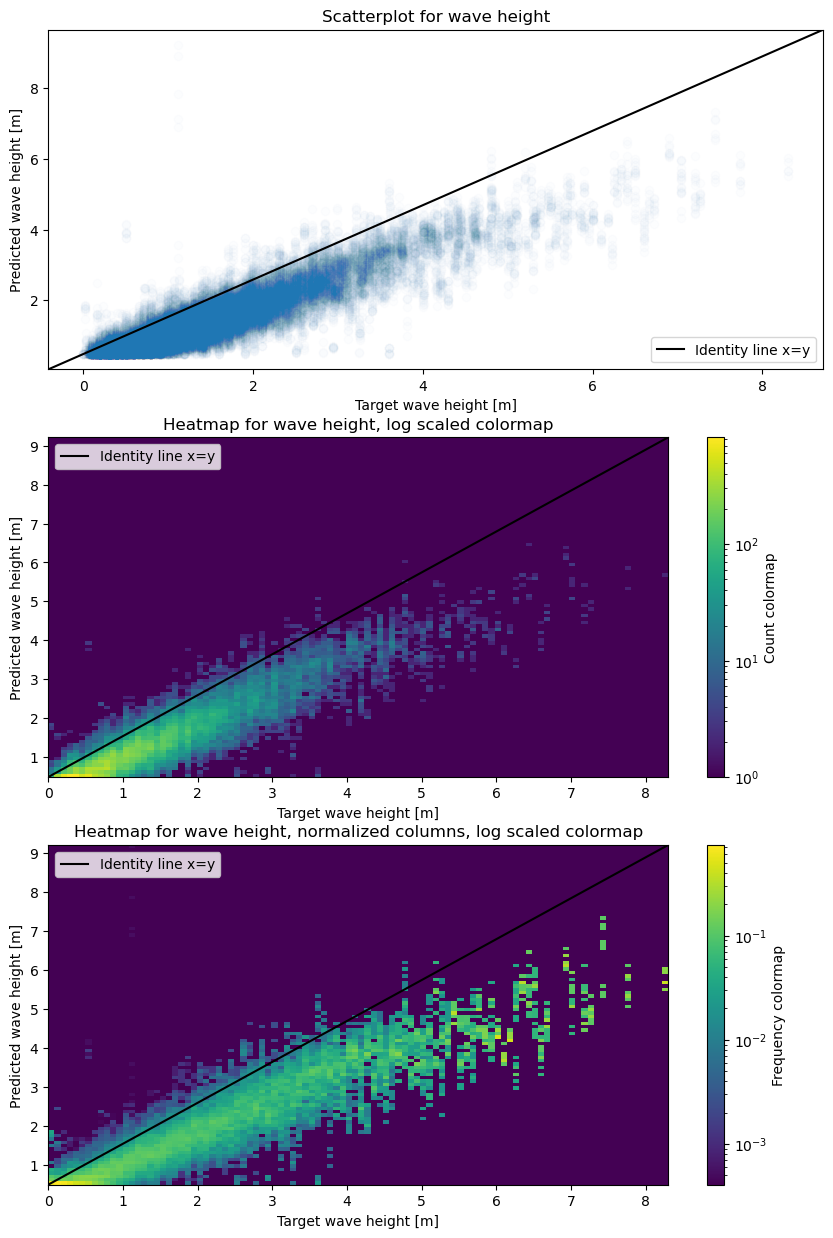

In [91]:
scatterplot_and_heatmaps(wave_result_df, "wave height", "m", "target_wave", "predictions_wave")

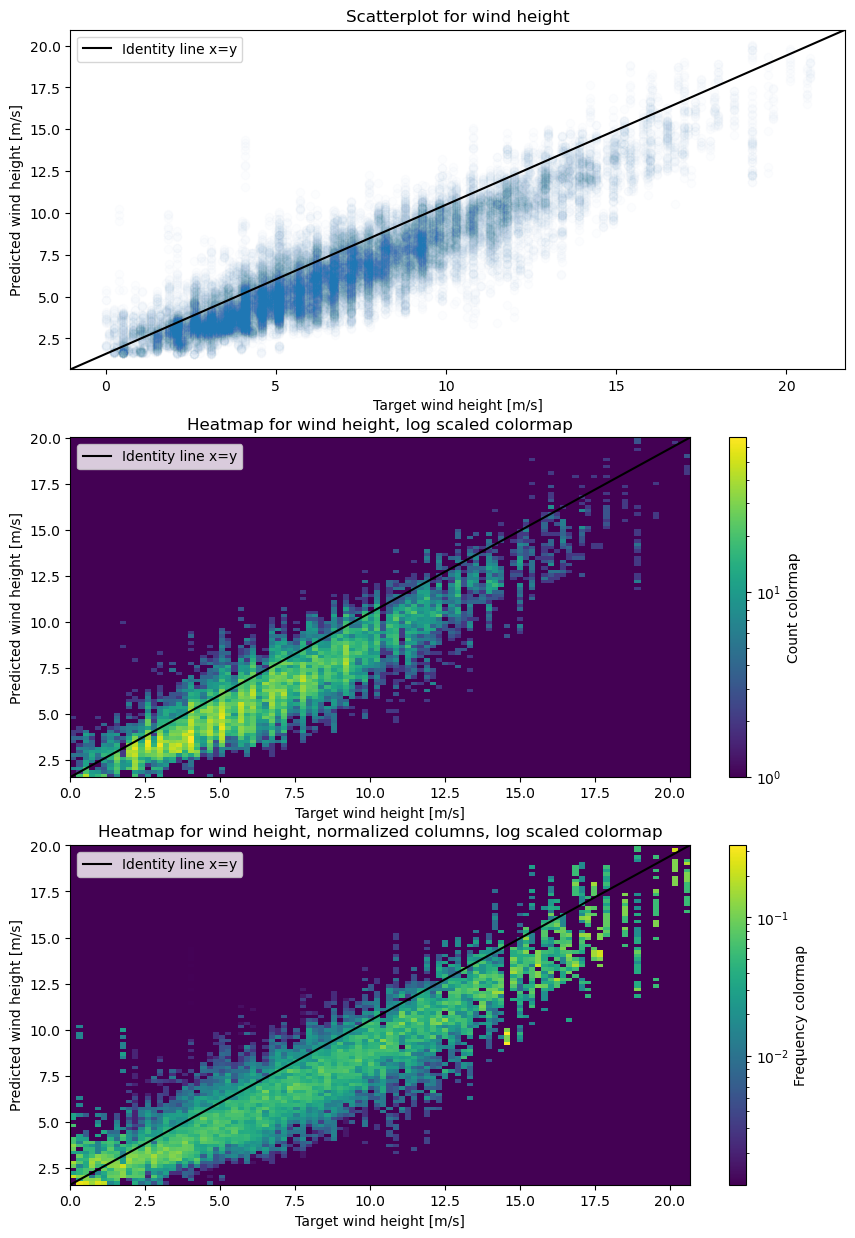

In [92]:
scatterplot_and_heatmaps(wind_result_df, "wind height", "m/s", "target_wind", "predictions_wind")